In [47]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType, DateType
import pyspark as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import re
import dateparser
import datetime

pd.set_option('display.max_columns', None)


In [48]:
current_df = pd.read_csv('~/dsi/capstones/cap1/data/phone_dataset.csv', sep=',')

# current_df

In [49]:
cop_df = current_df.copy()

# Different Date Formats

# 0:     2009  February. Released 2009  April
# 23:    2011  February
# 45:    2012  Q3
# 103:   1997
# 144:   2003 1Q
# 202:   2007. Released 2007
# 459:   2Q  2003
# 461:   Exp. announcement 2012  August
# 1091:  Not officially announced yet 
# 1097:  (null) NaN
# 1649:  Not officially announced yet. Released Exp. release 2009  Q4
# 1703:  Feb-01
# 1708:  Q2 2001 ?
# 2228:  " "2013  February
# 2453:  Exp. announcement 2015  Q3
# 2987:  Not announced yet
# 5032:  2004 1 Q
# 5177:  2002  Oct
# 7090:  Never
# 7379:  4Q 2001

toy_df = cop_df.iloc[[0, 23, 45, 103, 144, 202, 459, 461, 1091, 1097, 1649,
                  1703, 1708, 2228, 2453, 2987, 5032, 5177, 7090, 7379]]

toy_df

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_size,display_resolution,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,Available. Released 2016 October,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260,9.17,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP| autofocus,2 MP| 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
23,Acer,Liquid Z520,GSM / HSPA,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA 900 / 2100,NaN,HSPA,Yes,Yes,2015 March,Available. Released 2015 April,154 x 86 x 6.4 mm (6.06 x 3.39 x 0.25 in),118,4.16,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,TFT capacitive touchscreen,5.0 inches (~57.1% screen-to-body ratio),480 x 854 pixels (~187 ppi pixel density),Android 4.4.2 (KitKat),Quad-core 1.3 GHz Cortex-A7,Mediatek MT6582M,Mali-400MP2,microSD up to 32 GB (dedicated slot),8 GB,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Wi-Fi 802.11 b/g/n| hotspot,4.0| A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Po 2000 mAh battery,Black| White,130.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
45,Acer,Liquid S2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 2100,LTE band 3(1800)| 7(2600)| 20(800),HSPA 42.2/5.76 Mbps LTE-A Cat4 150/50 Mbps,Yes,Yes,2013 August,Available. Released 2013 December,166 x 86.2 x 9 mm (6.54 x 3.39 x 0.35 in),229,8.08,Nano-SIM,IPS LCD capacitive touchscreen 16M colors,6.0 inches (~69.0% screen-to-body ratio),1080 x 1920 pixels (~368 ppi pixel density),Android 4.2.2 (Jelly Bean),Quad-core 2.2 GHz Krait 400,Qualcomm MSM8974 Snapdragon 800,Adreno 330,microSD up to 64 GB (dedicated slot),16 GB,2 GB RAM,13 MP| autofocus| quad-LED (ring) flash,2 MP| 1080p@30fps,Yes with stereo speakers,Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| Wi-Fi Dire...,4.0| A2DP,Yes with A-GPS GLONASS,Yes,Stereo FM radio| RDS,microUSB 2.0,Accelerometer| gyro| proximity| compass,Non-removable Li-Po 3300 mAh battery,Black| Red,340.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
103,alcatel,A3 XL,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 900 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2017 January,Coming soon. Exp. release 2017 Q2,165 x 82.5 x 7.9 mm (6.50 x 3.25 x 0.31 in),NaN,NaN,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS FL LCD capacitive touchscreen 16M colors,6.0 inches (~72.9% screen-to-body ratio),720 x 1280 pixels (~245 ppi pixel density),Android 7.0 (Nougat),Quad-core 1.1 GHz Cortex-A53,Mediatek MT8735B,Mali-T720MP2,microSD up to 32 GB,16 GB,2 GB RAM,8 MP| autofocus| LED flash,5 MP| 720p,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.2| A2DP| LE,Yes with A-GPS,NaN,FM radio,microUSB 2.0| USB On-The-Go,Fingerprint (rear-mounted)| accelerometer| pro...,Non-removable Li-Ion 3000 mAh battery,Sideral Gray/Silver| White/Silver| White/Blue...,120.0,http://cdn2.gsmarena.com/vv/bigpic/alcatel-a3-...
144,alcatel,Idol 3 (4.7),GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA 850 / 900 / 1900 / 2100 - EMEA,LTE band 1(2100)| 3(1800)| 7(26

In [50]:
# DATE CONVERSION

# Parsing variables
years = range(1994, 2017)

months = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']

months_short = ['Jan-', 'Feb-', 'Mar-', 'Apr-', 'May-', 'Jun-', 
                'Jul-', 'Aug-', 'Sep-', 'Oct-', 'Nov-', 'Dec-']

months_num = np.linspace(0.0, 1.0, num=12)

months_int = range(1, 12)

months_dict = {
    'January':1, 
    'February':2, 
    'March':3, 
    'April':4, 
    'May':5, 
    'June':6, 
    'July':7, 
    'August':8, 
    'September':9, 
    'October':10, 
    'November':11, 
    'December':12
}

quarters = ['Q1', '1Q', 'Q2', '2Q', 'Q3', '3Q', 'Q4', '4Q']

quarters_dict = {
  'Q1': 'February',
  '1Q': 'February',
  'Q2': 'May',
  '2Q': 'May',
  '3Q': 'August',
  'Q3': 'August',
  '4Q': 'November',
  'Q4': 'November'
}


In [51]:
def parse_date(date_str):
    
    # Removes preceding and proceding spaces
    date_str = date_str.strip()
    
    # Changes strings with "?" to "remove"
    if '?' in date_str:
        date_str = 'remove'
    
    # Removes errant release dates
    if '.' in date_str:
        split_str = date_str.split('.')
        date_str = split_str[0]
    
    # Changes Quarter to Middle Month of Quarter
    for key, val in quarters_dict.items():
        if key in date_str:
            split_2 = date_str.split()
            split_2[split_2.index(key)] = val
            date_str = " ".join(split_2)

    # Converts Year Only to Year + ' July'
    if len(date_str) < 5:
        date_str += ' July'    
    
    # If date is formated in short form i.e. "Feb-01"
    m_index = 0
    for m in months_short:
        if m in date_str:
            split_3 = date_str.split('-')
            split_3[0] = months[m_index]
            split_3[1] = f'20{split_3[1]}'
            date_str = " ".join(split_3)
        m_index += 1
       
    # Date Parsing str using module dataparser    
    date_tm = dateparser.parse(date_str)
    if isinstance(date_tm, datetime.date):
        date_tm = date_tm - datetime.timedelta(days=date_tm.day-1)
        
        
    return date_tm



# parse_date('2009  February. Released 2009  April')
# parse_date('2009  Q1. Released 2009  April')
# parse_date('2012  Q3')
# parse_date('1Q 2003')
# parse_date('2003')
# parse_date('Feb-01')


In [52]:
# Re-sort date str - Maybe Delete
def re_sort(date_str):
    sorted_str = ''
    
    # Re-sort Month and Year
    for m in months:
#         print(m)
        if m in date_str:
            sorted_str = m
    for y in years:
#         print(y)
        if str(y) in date_str:
            sorted_str = sorted_str + ' ' + str(y)
            break
            
    return sorted_str

# date_test = '2009  February. Released 2009  April'
# re_sort(parse_date(date_test))


In [53]:
# Is Unique Function - Delete
def is_unique(check_list):
    unique_set = set(check_list)
    unique_list = list(unique_set)
    return unique_list

# toy_list = toy_df['brand'].tolist()
# print(toy_list)

# u_list = is_unique(toy_list)
# u_list.sort()
# u_list



In [54]:
# Find Model Names
def unique_models(_list, split_1 = None, split_2 = None):
#     _list = model_list
    unique_list = []
    
    if split_1 is None and split_2 is None:
        for n in _list:
            unique_list.append(n)
            unique_list = is_unique(unique_list)
            
            
#     elif split_1 or split_2:
#         for n in _list:
#             n_dict = {}
#             split_atr = n.split(split_2)
#             split_atr = split_atr.split(split_1)
#             n_dict[split_atr[0]] = []
#             comb_back = ' '.join(split_atr[1:])
#             n_dict[split_atr[0]].extend(comb_back)
#             unique_list.append(n_dict)
    
    elif split_1:
        for n in _list:
            n_dict = {}
            split_atr = n.split(split_1)
            n_dict[split_atr[0]] = []
            n_dict[split_atr[0]].extend(split_atr[1:])
            unique_list.append(n_dict)
    
    return unique_list

toy_list = toy_df['model'].tolist()
u_brands = unique_models(toy_list, ' ')
u_brands


[{'Iconia': ['Talk', 'S']},
 {'Liquid': ['Z520']},
 {'Liquid': ['S2']},
 {'A3': ['XL']},
 {'Idol': ['3', '(4.7)']},
 {'Evolve': []},
 {'X4': ['Soul', 'Mini']},
 {'P6': ['Energy', 'Mini']},
 {'Playbook': ['2012']},
 {'Studio': ['J2']},
 {'Click': ['Plus']},
 {'GS': ['18']},
 {'glofiish': ['X900']},
 {'P10': ['Plus']},
 {'JAMA': ['201']},
 {'X': ['power2']},
 {'XDA': ['Atom', 'Life']},
 {'Eluga': ['I3']},
 {'SGD-1050': []},
 {'Xperia': ['Z4', 'Compact']}]

In [55]:
# Remove Date-less Objects
def refactor_df(df, col='announced'):
    step_df = df[df['announced'].notna()]
    
    step_df['announced'] = step_df['announced'].apply(parse_date)
    
    step_df['announced'] = step_df['announced'].dt.to_period('M')
    
    return step_df


In [56]:
# Cast NaN/Null

make_nan = ['No', 'N/A', 'No cellular connectivity']

def cast_nan(step_df, make_nan):
#     if nan_str in nan_list:
#         nan_str = NaN
    df_obj = step_df.select_dtypes(['object'])

    step_df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

    step_df.replace(to_replace=make_nan, value=np.nan, inplace=True)
    
    return step_df


In [57]:
# Drop Columns



In [58]:
toy_df = refactor_df(toy_df)

toy_df = cast_nan(toy_df, make_nan)

# toy_df

In [59]:
toy_df

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_size,display_resolution,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016-08,Available. Released 2016 October,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260,9.17,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP| autofocus,2 MP| 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
23,Acer,Liquid Z520,GSM / HSPA,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA 900 / 2100,NaN,HSPA,Yes,Yes,2015-03,Available. Released 2015 April,154 x 86 x 6.4 mm (6.06 x 3.39 x 0.25 in),118,4.16,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,TFT capacitive touchscreen,5.0 inches (~57.1% screen-to-body ratio),480 x 854 pixels (~187 ppi pixel density),Android 4.4.2 (KitKat),Quad-core 1.3 GHz Cortex-A7,Mediatek MT6582M,Mali-400MP2,microSD up to 32 GB (dedicated slot),8 GB,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Wi-Fi 802.11 b/g/n| hotspot,4.0| A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Po 2000 mAh battery,Black| White,130.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
45,Acer,Liquid S2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 2100,LTE band 3(1800)| 7(2600)| 20(800),HSPA 42.2/5.76 Mbps LTE-A Cat4 150/50 Mbps,Yes,Yes,2013-08,Available. Released 2013 December,166 x 86.2 x 9 mm (6.54 x 3.39 x 0.35 in),229,8.08,Nano-SIM,IPS LCD capacitive touchscreen 16M colors,6.0 inches (~69.0% screen-to-body ratio),1080 x 1920 pixels (~368 ppi pixel density),Android 4.2.2 (Jelly Bean),Quad-core 2.2 GHz Krait 400,Qualcomm MSM8974 Snapdragon 800,Adreno 330,microSD up to 64 GB (dedicated slot),16 GB,2 GB RAM,13 MP| autofocus| quad-LED (ring) flash,2 MP| 1080p@30fps,Yes with stereo speakers,Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| Wi-Fi Dire...,4.0| A2DP,Yes with A-GPS GLONASS,Yes,Stereo FM radio| RDS,microUSB 2.0,Accelerometer| gyro| proximity| compass,Non-removable Li-Po 3300 mAh battery,Black| Red,340.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
103,alcatel,A3 XL,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 900 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2017-01,Coming soon. Exp. release 2017 Q2,165 x 82.5 x 7.9 mm (6.50 x 3.25 x 0.31 in),NaN,NaN,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS FL LCD capacitive touchscreen 16M colors,6.0 inches (~72.9% screen-to-body ratio),720 x 1280 pixels (~245 ppi pixel density),Android 7.0 (Nougat),Quad-core 1.1 GHz Cortex-A53,Mediatek MT8735B,Mali-T720MP2,microSD up to 32 GB,16 GB,2 GB RAM,8 MP| autofocus| LED flash,5 MP| 720p,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.2| A2DP| LE,Yes with A-GPS,NaN,FM radio,microUSB 2.0| USB On-The-Go,Fingerprint (rear-mounted)| accelerometer| pro...,Non-removable Li-Ion 3000 mAh battery,Sideral Gray/Silver| White/Silver| White/Blue...,120.0,http://cdn2.gsmarena.com/vv/bigpic/alcatel-a3-...
144,alcatel,Idol 3 (4.7),GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA 850 / 900 / 1900 / 2100 - EMEA,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20.

In [62]:
period_df = refactor_df(cop_df)

period_df = cast_nan(period_df, make_nan)


/Users/cv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/cv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [61]:
period_df.head(10)

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_size,display_resolution,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)| 3(1800)| 7(2600)| 8(900)| 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016-08,Available. Released 2016 October,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260,9.17,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP| autofocus,2 MP| 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
1,Acer,Liquid Z6 Plus,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016-08,Available. Released 2016 December,153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),169,5.96,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),1080 x 1920 pixels (~401 ppi pixel density),Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),32 GB,3 GB RAM,13 MP| autofocus| LED flash,5 MP,Yes,Yes,Wi-Fi 802.11 b/g/n| Wi-Fi Direct| hotspot,4.0| A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Fingerprint (front-mounted)| accelerometer| pr...,Removable Li-Po 4080 mAh battery,Black| White,250.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
2,Acer,Liquid Z6,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,2016-08,Available. Released 2016 December,-,NaN,NaN,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM|...,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,8 GB,1 GB RAM,8 MP| autofocus| LED flash,2 MP,Yes,Yes,Yes,Yes,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer| proximity,Removable Li-Ion 2000 mAh battery,Black| White,120.0,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
3,Acer,Iconia Tab 10 A3-A40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04,Available. Released 2016 June,259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),NaN,NaN,NaN,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),1920 x 1200 pixels (~224 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),16/32/64 GB,2 GB RAM,5 MP,2 MP,Yes with stereo speakers (4 speakers),Yes,Wi-Fi 802.11 a/b/g/n/ac| dual-band| hotspot,Yes,NaN,NaN,NaN,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230.0,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
4,Acer,Liquid X2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe| Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015-04,Available. Released 2016 February,153.3 x 78.8 x 8.5 mm (6.04 x 3.10 x 0.33 in),166,5.86,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),32 GB,3 GB RAM,13 MP| f/1.8| autofocus| LED flash|,13 MP| f/1.8

In [64]:
# Screen Size

def screen_refactor(s, split_char=' '):
    s = str(s)
    s = s.replace('| -', '')
    s = s.replace('|', '')
    s = s.strip()
    
    
    if isinstance(s, str):
        split_s = s.split(split_char)
        try 
        return split_s[0]
    else:
        return s

# test_s = '1.6 inches (~25.2% screen-to-body ratio)'
# screen_refactor(test_s)


# def is_tablet(size_flt, output='tablet'):
#     if size_flt 
    
    

    


In [65]:
period_df['screen_in'] = period_df['display_size'].apply(screen_refactor)


/Users/cv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


TypeError: 'Text' object is not callable

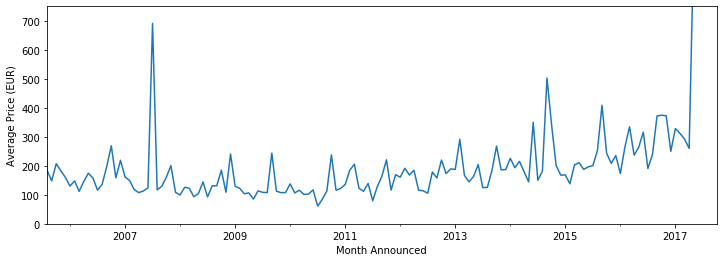

In [85]:
# period_df.agg({'announced':'count', 'approx_price_EUR':'mean'})
fig = plt.figure(figsize=(12,4))

# toy_df.groupby('announced').mean()['approx_price_EUR']

ax1 = period_df.groupby('announced').mean()['approx_price_EUR'].plot(
    xlim=[pd.Timestamp('2005-08-01'), pd.Timestamp('2017-10-01')], ylim=[0, 750])

ax1.set_ylabel('Average Price (EUR)')
ax1.set_xlabel('Month Announced')
# ax1.title("Average Price (EUR) of Phones Announced on Given Month")


In [86]:
# period_df.agg({'announced':'count', 'approx_price_EUR':'mean'})
fig2 = plt.figure(figsize=(12,4))

# toy_df.groupby('announced').mean()['screen_in']

ax2 = period_df.groupby('announced').mean()['screen_in'].plot(
    xlim=[pd.Timestamp('2005-08-01'), pd.Timestamp('2017-10-01')])

ax2.set_ylabel('Average Price (EUR)')
ax2.set_xlabel('Month Announced')
# ax1.title("Average Price (EUR) of Phones Announced on Given Month")

KeyError: 'screen_in'

<Figure size 864x288 with 0 Axes>

In [66]:
# Group By

period_df.groupby('announced').count()

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,status,dimentions,weight_g,weight_oz,SIM,display_type,display_size,display_resolution,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url,screen_in
announced,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1994-07,1,1,1,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1995-07,8,8,8,8,0,0,0,0,0,8,8,8,8,8,8,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2,0,8,8
1996-07,7,7,7,7,0,0,0,0,0,7,7,7,7,7,7,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,7,7
1997-07,21,21,21,21,0,0,0,0,0,21,21,21,21,21,21,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,6,0,21,21
1998-07,33,33,33,33,0,0,0,0,0,33,33,33,33,33,33,0,33,0,1,0,0,0,2,0,0,0,4,0,0,0,0,0,1,0,0,33,23,0,33,33
1999-07,62,62,62,62,0,0,0,0,0,62,62,62,62,62,62,1,62,0,1,0,0,1,1,0,0,0,3,0,0,0,1,0,0,0,0,62,43,0,62,62
2000-07,81,81,81,81,0,0,0,0,0,81,81,81,81,81,81,2,81,2,2,0,0,2,1,0,0,0,19,0,0,1,1,0,3,0,1,81,58,0,81,81
2000-08,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1
2001-05,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1


In [706]:
# Find Floating Point Regex



In [790]:
print(toy_df['announced'].max())
print(toy_df['announced'].min())


# def day_diff(a,b) = toy_df['announced'].max() - toy_df['announced'].min()
#     return a.max() - toy_df['announced'].min()
def month_diff(a, b):
    return 12 * (a.year - b.year) + (a.month - b.month)

month_diff(toy_df['announced'].max(), toy_df['announced'].min())

Not officially announced yet
1996


AttributeError: 'str' object has no attribute 'year'

In [712]:
df_feature = toy_df[['bluetooth', 'announced']]
    
date_max = df_feature['announced'].max()
date_min = df_feature['announced'].min()

month_period = month_diff(date_max, date_min)
day_period = date_max - date_min

# date_array = {date_min:0}
# for x in range(1, month_period):
#     date_n = date_array[x-1] + datetime.timedelta(days=31)
#     date_n = date_n - datetime.timedelta(days=date_n.day-1)
#     date_array.append({date_n: 0})
    
# plot.bar(date_array )  

# date_array2 = pd.date_range(date_min, date_max, freq='M')

    
date_counts = df_feature.groupby([df_feature['announced'].dt.year, df_feature['announced'].dt.month]).count()

date_counts['announced_year'] = date_counts.index.get_level_values(0).astype(int)
date_counts['announced_month'] = date_counts.index.get_level_values(1).astype(int)
date_counts = date_counts.reset_index(drop=True)
date_counts = date_counts.drop('announced', axis=1)

# date_counts

date_counts['datetime'] = date_counts.apply(lambda row: datetime.date(year=row[1], month=row[2], day=1), axis=1)

# date_array = [date_min + datetime.timedelta(months=x) for x in range(0, (date_max-date_min)]
date_counts = date_counts.set_index('datetime')
date_counts.index = pd.to_datetime(date_counts.index)
date_counts.index = date_counts.index.to_period('M')

date_array2 = pd.DataFrame(index=date_array2.to_period('M'))
date_array2.join(date_counts)

AttributeError: 'PeriodIndex' object has no attribute 'to_period'

In [476]:
# Histogram Plot of Datetimes

def period_hist(
    df_count = None, feature_count = None,
    start_date = (1994, 7, 0), end_date = (2017, 6, 0), format_tight = None,
    apple_date = None, year_only = None
):
    
    df_feature = df_count[[feature_count, 'announced']]
    
    date_max = df_feature['announced'].max()
    date_min = df_feature['announced'].min()
    
    month_period = month_diff(date_max, date_min)
    day_period = date_max - date_min
    
    for x in range(0, month_period):
        
                   
    date_array = [date_min + datetime.timedelta(months=x) for x in range(0, (date_max-date_min)]
    
    if format_tight:
        date_diff = df_count['announced'].max() - df_count['announced'].min()
        
#     df_feature.announced.dt.month.hist(bins=month_period)    
    
    date_tm = date_tm - datetime.timedelta(days=date_tm.day-1)
    
#     x_dates = df_feature[feature_count]
#     y_count = [1] * len(x_dates)
    
    date_counts = df_feature.groupby([df_feature['announced'].dt.year, df_feature['announced'].dt.month]).count()
    
    
    
#     df_feature.groupby([df_feature['announced'].dt.year, df_feature['announced'].dt.month]).count().barplot()
        
#     parse_date(str(df_count.announced))
    
#     df_feature.hist(figsize=(12, 5), grid=False)
#     plt.tight_layout() 
    
#     df_feature.groupby([df_feature['announced'].dt.year, df_feature['announced'].dt.month]).count().plot(kind="bar") 
 
    return 

period_hist(df_count = toy_df, feature_count = 'weight_g')



SyntaxError: invalid syntax (<ipython-input-476-6497803ec264>, line 17)

In [207]:
# Additional Functions



